Прогноз смертности в больницах для пациентов с сердечной
недостаточностью (СН), поступивших в отделения интенсивной терапии,
основанный на машинном обучении ретроспективный анализ базы данных
MIMIC-III ('Medical Information Mart for Intensive Care') Магазин медицинской
информации для интенсивной терапии.

Задача разработать и проверить модель прогнозирования госпитальной
смертности от всех причин среди пациентов с СН, поступивших в отделение
интенсивной терапии.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.float_format = "{:,.2f}".format

In [17]:
df = pd.read_csv('/home/roman/Документы/DataScience/20.Финальный проект(05.06.22)/DataSet(kaggle)/data01.csv')

In [18]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.00,72,1,37.59,0,0,0,1,...,138.75,7.46,109.17,13.17,2.62,7.23,21.17,0.50,40.00,55
1,1,139812,0.00,75,2,NaN,0,0,0,0,...,138.89,8.16,98.44,11.44,1.89,7.22,33.44,0.50,78.00,55
2,1,109787,0.00,83,2,26.57,0,0,0,0,...,140.71,8.27,105.86,10.00,2.16,7.27,30.57,0.50,71.50,35
3,1,130587,0.00,43,2,83.26,0,0,0,0,...,138.50,9.48,92.07,12.36,1.94,7.37,38.57,0.60,75.00,55
4,1,138290,0.00,75,2,31.82,1,0,0,0,...,136.67,8.73,104.50,15.17,1.65,7.25,22.00,0.60,50.00,55


In [19]:
df.shape

(1177, 51)

In [20]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [22]:
x = df.drop(columns='outcome')

y = df[['outcome']]

# Замена Пропущенных Значений

## Отсутствующие значения типа Float и Int меняем на средние значения

In [23]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy='mean')

In [24]:
col = x.select_dtypes(include='float64').columns

In [25]:
col 

Index(['BMI', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2'],
      dtype='object')

In [26]:
si.fit(x[col])

SimpleImputer()

In [29]:
x[col] = si.transform(x[col])

In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   age                       1177 non-null   int64  
 3   gendera                   1177 non-null   int64  
 4   BMI                       1177 non-null   float64
 5   hypertensive              1177 non-null   int64  
 6   atrialfibrillation        1177 non-null   int64  
 7   CHD with no MI            1177 non-null   int64  
 8   diabetes                  1177 non-null   int64  
 9   deficiencyanemias         1177 non-null   int64  
 10  depression                1177 non-null   int64  
 11  Hyperlipemia              1177 non-null   int64  
 12  Renal failure             1177 non-null   int64  
 13  COPD                      1177 non-null   int64  
 14  heart ra

# Переменной outcome присваиваем наиболее частое значение

In [31]:
SI =  SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [32]:
SI.fit(y)

SimpleImputer(strategy='most_frequent')

In [33]:
y = SI.transform(y)

In [34]:
y = pd.DataFrame(y, columns=['outcome'], dtype='int64')

In [35]:
y

,outcome
0,0
1,0
2,0
3,0
4,0
...,...
1172,0
1173,0
1174,0
1175,0


# ETL - Extract, transform, load

In [36]:
df_final = x.copy()

df_final['outcome'] = y

In [37]:
df_final

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome
0,1,125047,72,1,37.59,0,0,0,1,1,...,7.46,109.17,13.17,2.62,7.23,21.17,0.50,40.00,55,0
1,1,139812,75,2,30.19,0,0,0,0,1,...,8.16,98.44,11.44,1.89,7.22,33.44,0.50,78.00,55,0
2,1,109787,83,2,26.57,0,0,0,0,1,...,8.27,105.86,10.00,2.16,7.27,30.57,0.50,71.50,35,0
3,1,130587,43,2,83.26,0,0,0,0,0,...,9.48,92.07,12.36,1.94,7.37,38.57,0.60,75.00,55,0
4,1,138290,75,2,31.82,1,0,0,0,1,...,8.73,104.50,15.17,1.65,7.25,22.00,0.60,50.00,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,62,1,25.52,1,1,0,1,0,...,10.27,94.43,20.14,2.71,7.38,27.71,1.85,45.54,40,0
1173,2,101659,78,1,25.82,0,1,0,1,0,...,10.52,101.72,18.16,2.01,7.38,20.48,1.85,45.54,30,0
1174,2,162069,85,2,23.89,1,1,0,1,1,...,8.47,97.29,14.00,2.03,7.38,28.86,1.85,45.54,55,0
1175,2,120967,79,2,35.29,0,0,1,1,1,...,8.18,104.00,15.75,2.09,7.38,24.38,1.85,45.54,25,0


In [38]:
df_final.groupby(by='group').describe().round().T

group                  1          2
ID      count     825.00     352.00
        mean  150,743.00 150,861.00
        std    29,150.00  28,803.00
        min   100,213.00 100,449.00
        25%   125,433.00 126,352.00
...                  ...        ...
outcome min         0.00       0.00
        25%         0.00       0.00
        50%         0.00       0.00
        75%         0.00       0.00
        max         1.00       1.00

[400 rows x 2 columns]

# Визуализация зависимой переменной

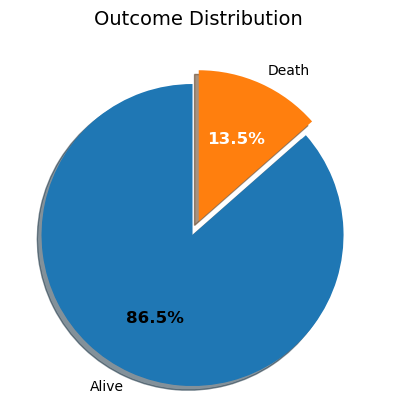

In [39]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(df_final['outcome'].value_counts(), autopct= '%1.1f%%', shadow=True, 
                                   startangle=90, explode=(0.1, 0), labels=['Alive','Death'])

plt.setp(autotexts, size=12, color = 'black', weight='bold')
autotexts[1].set_color('white');

plt.title('Outcome Distribution', fontsize=14)
plt.show()

### Как видно данные сильно разбалансированы

# Влияние сопутствующих заболеваний на смертность

### 0 - указывает на пациента без определенного сопутствующего заболевания
### 1 - пациент с указанным сопутствующим заболеванием

### Гипертония

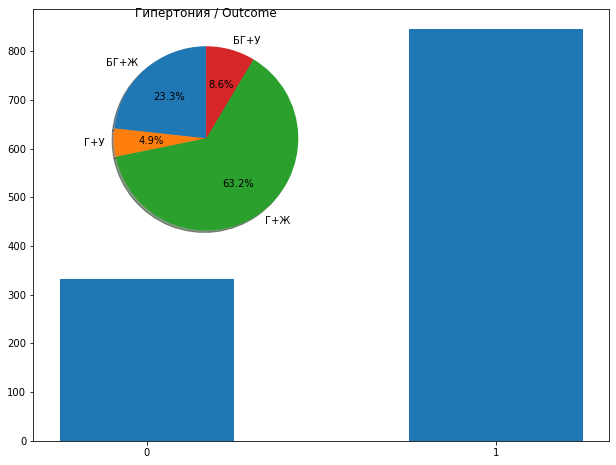

In [41]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.1,0.4, 0.4,0.6])
lab = ['БГ+Ж', 'Г+У', 'Г+Ж', 'БГ+У']
ax1.bar(df_final['hypertensive'].unique(),df_final['hypertensive'].value_counts(sort=False), width=0.5)
ax1.set_xticks([0,1])

ax2.pie(df_final.groupby(by=['hypertensive', 'outcome']).outcome.count(), autopct= '%1.1f%%', shadow=True, 
                                   startangle=90, labels=lab)
plt.title('Гипертония / Outcome')

plt.show()

#### Из приведенного выше графика **1** - это пациенты с артериальной гипертонией и 0 - пациенты без гипертонии

> Г+Ж - с гипертонией + жив (63.2%)

> Г+У - с гипертонией + умер (4.9%)

> БГ+Ж = без гипертонии + жив (23.3%)

> БГ+У = без гипертонии + умер (8.6%)


### Фибрилляция предсердий

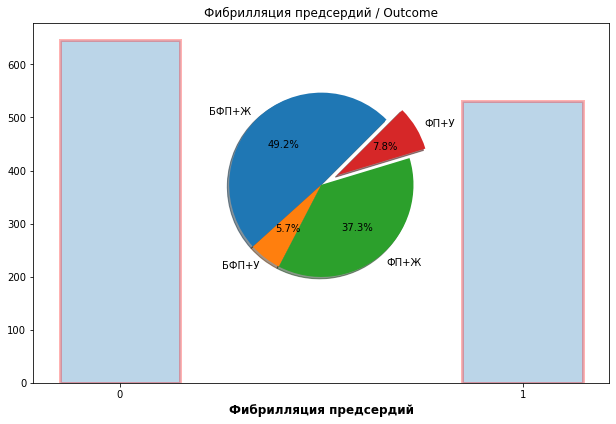

atrialfibrillation  outcome
0                   0          579
                    1           67
1                   0          439
                    1           92
Name: outcome, dtype: int64


In [44]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.3,0.2, 0.4,0.7])
lab = ['БФП+Ж', 'БФП+У', 'ФП+Ж', 'ФП+У']

ax1.bar(df_final['atrialfibrillation'].unique(), df_final['atrialfibrillation'].value_counts(sort=False), 
        width=0.3, alpha=0.3, edgecolor='red', linewidth=3)
ax1.set_xticks([0,1])
ax1.set_xlabel('Фибрилляция предсердий', fontsize=12, weight='bold')
ax1.set_title('Фибрилляция предсердий / Outcome')

ax2.pie(df_final.groupby(['atrialfibrillation', 'outcome']).outcome.count(),autopct='%1.1f%%', 
        shadow=True, labels=lab, explode=(0,0,0,0.2), startangle=45)

plt.show()

print(df_final.groupby(['atrialfibrillation', 'outcome']).outcome.count())

### Из приведенного выше графика

Столбчатый график показывает наличие фибрилляции предсердий

0 - Пациенты без фибрилляции предсердий,
1 - Пациенты с фибрилляцией предсердий

> БФП+Ж = без фибриляций предсердий + жив (48.2%)

> БФП+У = без фибриляций предсердий + умер (5.7%)

> ФП+Ж = с фибриляций предсердий + жив (37.3%)

> ФП+У = с фибриляций предсердий + умер (7.8%)

### Ишемическая болезнь сердца (ИБС)

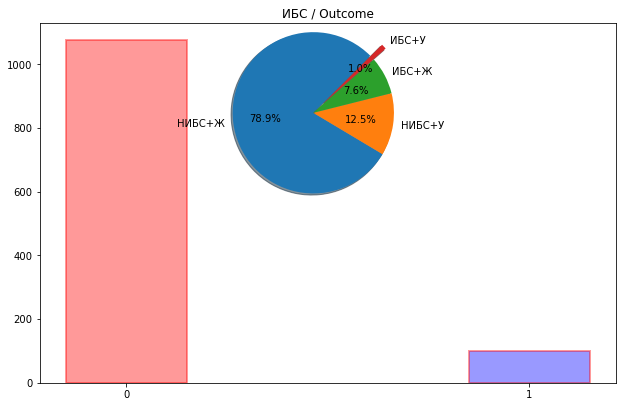

CHD with no MI  outcome
0               0          929
                1          147
1               0           89
                1           12
Name: outcome, dtype: int64


In [45]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.3,0.4, 0.35, 0.7])
lab = ['НИБС+Ж', 'НИБС+У', 'ИБС+Ж', 'ИБС+У']

ax1.bar(df_final['CHD with no MI'].unique(), df_final['CHD with no MI'].value_counts(sort=False), width=0.3,
        alpha=0.4, linewidth=2, edgecolor='r', color=['red', 'blue'])
ax1.set_xticks([0,1])

ax1.set_title('ИБС / Outcome')

ax2.pie(df_final.groupby(['CHD with no MI', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=lab,explode=(0,0,0,0.2), shadow=True, startangle=45)

plt.show()

print(df_final.groupby(['CHD with no MI', 'outcome']).outcome.count())

### Из приведенного выше графика

Столбчатый график показывает наличие ИБС

0 - Пациенты без ИБС,
1 - Пациенты с ИБС

> НИБС+Ж = без ИБС + Жив (78.9%)

> НИБС+У = без ИБС + Умер (12.5%)

> ИБС+Ж = с ИБС + Жив (7.6%)

> ИБС+У = с ИБС + Умер (1.0%)

# Диабет

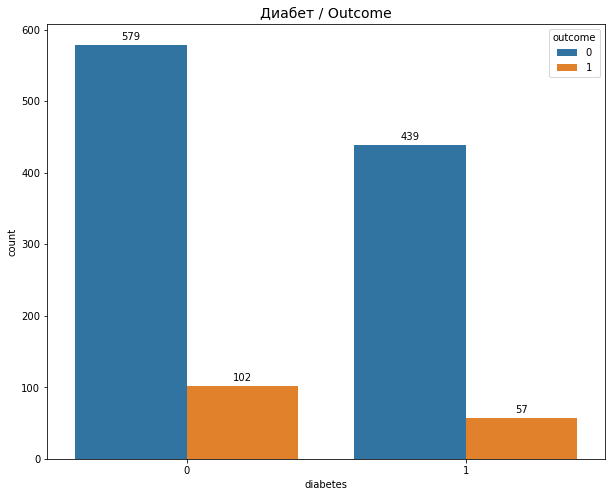

In [49]:
plt.figure(figsize=[10,8])
plot = sns.countplot(df_final['diabetes'], hue= df_final['outcome'])

for bar in plot.patches:
  plot.annotate(format(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, 
                bar.get_height()), ha='center', va='center',
                size=10, xytext=(0,8),
                textcoords = 'offset points')
  
plt.title('Диабет / Outcome', fontsize=14)

plt.show()

### Из приведенного выше графика


Столбчатый график показывает наличие Диабета

0 - Пациенты без сахарного диабета,
1 - Пациенты с сахарным диабетом

> БД+Ж = без диабета + жив (49.2%)

> БД+У = без диабета + умер (8.7%)

> Д+Ж = с диабетом + жив (37.3%)

> Д+У = с диабетом + умер (4.8%)

Результат говорит о том, что при отсутствии диабета смертность выше почти в два раза,
чем при его наличии, но это не обязательно значит, что диабет оказывает такое влияние.

# Депрессия

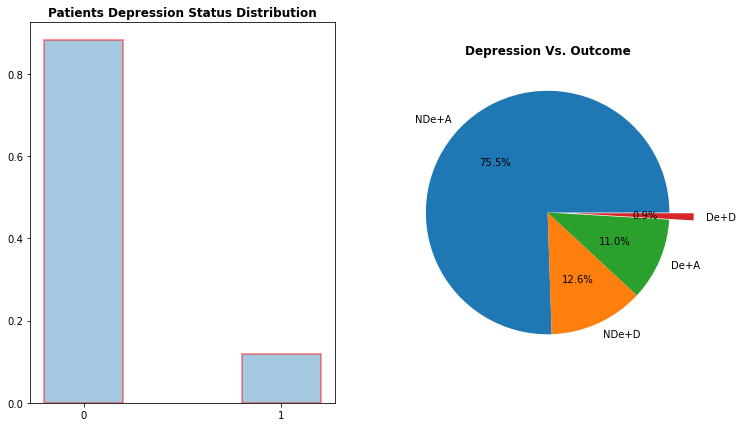

depression  outcome
0           0          889
            1          148
1           0          129
            1           11
Name: outcome, dtype: int64


In [50]:
fig, ax = plt.subplots(1,2, figsize=(12,7))

plot = ax[0].bar(df_final['depression'].unique(), df_final['depression'].value_counts(sort=False, normalize=True), width=0.4, alpha=0.4, edgecolor='red', linewidth=2)
ax[0].set_xticks([0,1])
ax[0].set_title('Patients Depression Status Distribution', weight='bold')

plt.subplot(1,2,2)
plt.pie(df_final.groupby(['depression', 'outcome']).outcome.count(), autopct='%1.1f%%', labels= ['NDe+A', 'NDe+D', 'De+A', 'De+D'],
        explode=(0,0,0,0.2))
plt.title('Depression Vs. Outcome', weight='bold')

plt.show()

print(df_final.groupby(['depression', 'outcome']).outcome.count())

### From the Above graph - Из приведенного выше графика

Bar Plot represent the **Depression** - Столбчатый график представляет собой депрессию ****

0 -  Patients without Depression, - 0 - Пациенты без депрессии,
1 -  Patients with Depression - 1 - Пациенты с депрессией

> NDe+A = Patients without Depression + Alive (75.5%)

> NDe+D = Patient without Depression + Death (12.6%)

> De+A = Patients with Depression + Alive (11.0%)

> De+D = Patients With Depression + Death (0.9%)

# Deficiency Anemia - Дефицитная анемия

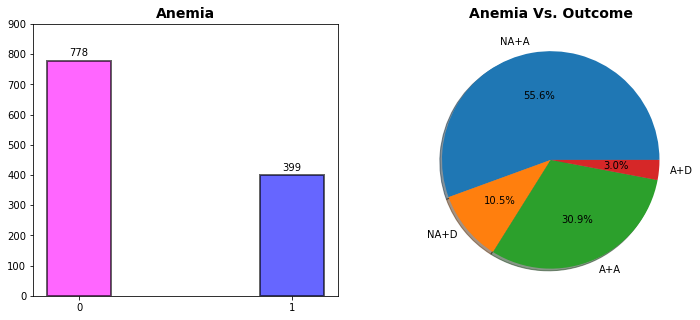

In [51]:
fig, ax = plt.subplots(1,2, figsize=(12,5))


ax[0].bar(df_final['deficiencyanemias'].unique(), df_final['deficiencyanemias'].value_counts(sort=False), 
          width=0.3, alpha=0.6, color=['blue', 'magenta'], edgecolor='k', linewidth=2)
ax[0].set_title('Anemia', fontsize=14, weight='bold')
ax[0].set_xticks([0,1])
ax[0].set_ylim(0, 900)

for x in ax[0].patches:
  ax[0].annotate(format(x.get_height()),
                 (x.get_x() + x.get_width() / 2,
                 x.get_height()), ha='center', va='center',
                 size=10, xytext=(0,8), 
                 textcoords = 'offset points')

ax[1].pie(df_final.groupby(['deficiencyanemias', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=['NA+A', 'NA+D', 'A+A', 'A+D'], shadow=True)
ax[1].set_title('Anemia Vs. Outcome', fontsize=14, weight='bold')

plt.show()

### From the Above graph - Из приведенного выше графика

Bar Plot represent the **Anemia** - Столбчатый график представляет собой *****

0 -  Patients without Anemia, - 0 - Пациенты без анемии,
1 -  Patients with Anemia - 1 - Пациенты с анемией

> NA+A = Patients without Anemia + Alive (55.6%)

> NA+D = Patient without Anemia + Death (10.5%)

> A+A = Patients with Anemia + Alive (30.9%)

> A+D = Patients with Anemia + Alive (3.0%)

# Hyperlipemia - Гиперлипемия

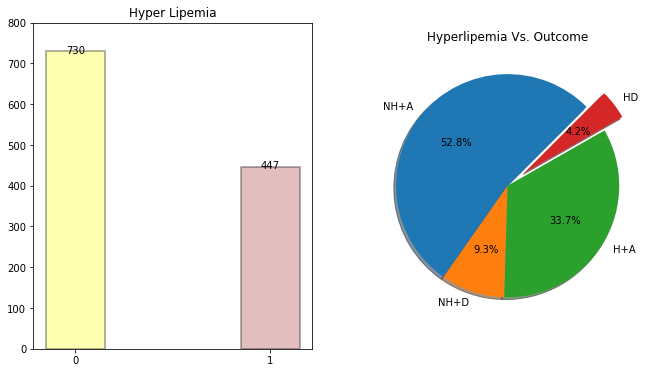

In [52]:
fig, ax = plt.subplots(1,2, figsize=(11,6))

ax[0].bar(df_final['Hyperlipemia'].unique(), df_final['Hyperlipemia'].value_counts(sort=False), width=0.3, 
          edgecolor='k', linewidth=2, alpha=0.3, color=['brown', 'yellow'])
ax[0].set_xticks([0,1])

for x in ax[0].patches:
  ax[0].annotate(format(x.get_height()),
                 (x.get_x()+x.get_width()/2,
                  x.get_height()), ha ='center', va='center',
                 size=10, xytext=(0,1),
                 textcoords='offset points')
  
ax[0].set_ylim(0,800)

ax[0].set_title('Hyper Lipemia')

ax[1].pie(df_final.groupby(['Hyperlipemia', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=['NH+A', 'NH+D', 'H+A', 'HD'], 
          explode=(0,0,0,0.2), startangle=45, shadow=True)
ax[1].set_title('Hyperlipemia Vs. Outcome')
plt.show()

### From the Above graph - Из приведенного выше графика

Bar Plot represent the **Hyperlipemia** - Столбчатый график представляет собой **Гиперлипемию**

0 -  Patients without Hyperlipemia, - 0 - Пациенты без гиперлипемии,
1 -  Patients with Hyperlipemia - 1 - Пациенты с гиперлипемией

> NH+A = Patients without Hyperlipemia + Alive (52.8%)

> NH+D = Patient without Hyperlipemia + Death (9.3%)

> H+A = Patients with Hyperlipemia + Alive (33.7%)

> H+D = Patients with Hyperlipemia + Alive (4.2%)

Почечная недостаточность

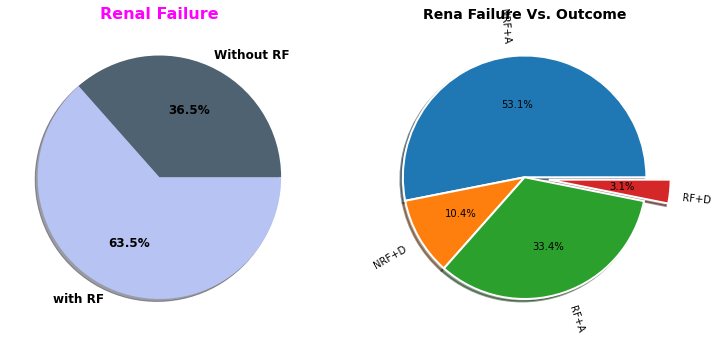

In [53]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.pie(df_final['Renal failure'].value_counts(sort=False), autopct='%1.1f%%', shadow=True, labels=['Without RF', 'with RF'],
        colors = ['#4F6272', '#B7C3F3'], textprops = {'color':'k', 'weight':'bold', 'size': 12}, 
        rotatelabels=False);
plt.title('Renal Failure', fontsize=16, weight='bold', color='magenta')

plt.subplot(1,2,2)
plt.pie(df_final.groupby(['Renal failure', 'outcome']).outcome.count(), autopct='%1.1f%%', shadow=True, 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        labels = ['NRF+A', 'NRF+D', 'RF+A', 'RF+D'],
        explode=(0,0,0,0.2), rotatelabels=True)
plt.title('Rena Failure Vs. Outcome', fontsize=14, weight='bold')

plt.show()

Из приведенного выше графика

Левая диаграмма показывает распределение пациентов с почечной недостаточностью и без неё

Правая диаграмма показывает смертность пациентов с почечной недостаточностью и без неё:

> NRF+A = Patients without Renal Failure + Alive (53.1%)

> NRF+D = Patient without Renal Failure + Death (10.4%)

> RF+A = Patients with Renal Failure + Alive (33.4%)

> RF+D = Patients with Renal Failure + Alive (3.1%)

# COPD - Хроническая обструктивная болезнь лёгких

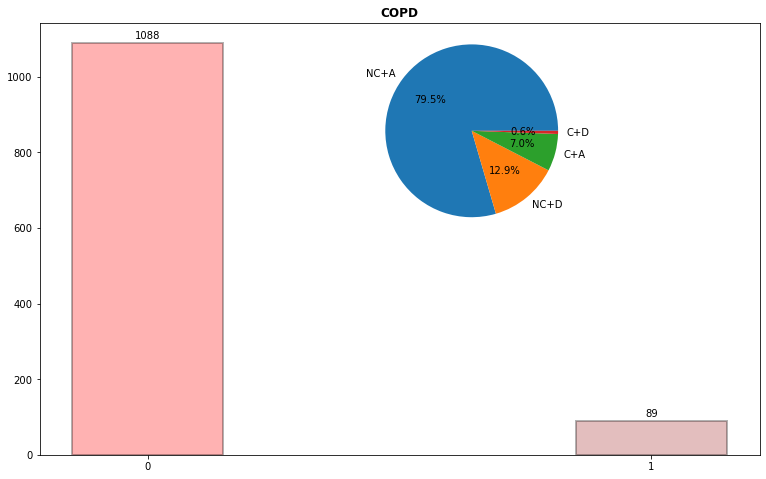

In [63]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,0.8,0.5])

ax1.bar(df_final['COPD'].unique(), df_final['COPD'].value_counts(), width=0.3, color=['red', 'brown'], alpha=0.3, edgecolor='k', linewidth=2)

for y in ax1.patches:
  ax1.annotate(format(y.get_height()),
               (y.get_x() + y.get_width()/2,
                y.get_height()), ha='center', va='center',
               size=10, xytext=(0,8),
               textcoords = 'offset points')
ax1.set_title('COPD', weight='bold')
ax1.set_xticks([0,1])

ax2.pie(df_final.groupby(['COPD', 'outcome']).outcome.count(), autopct='%1.1f%%',
        labels=['NC+A', 'NC+D', 'C+A', 'C+D'])

plt.show()

### From the Above graph 

Bar Plot represent the **COPD**

0 -  Patients without COPD,
1 -  Patients with COPD

> NC+A = Patients without COPD + Alive (79.5%)

> NC+D = Patient without COPD + Death (12.9%)

> C+A = Patients with COPD + Alive (7.0%)

> C+D = Patients with COPD + Alive (0.6%)

# Гендерное распределение

#### 1 мужчины
#### 2 женщины

In [64]:
df_final['gendera'].value_counts()

2    618
1    559
Name: gendera, dtype: int64

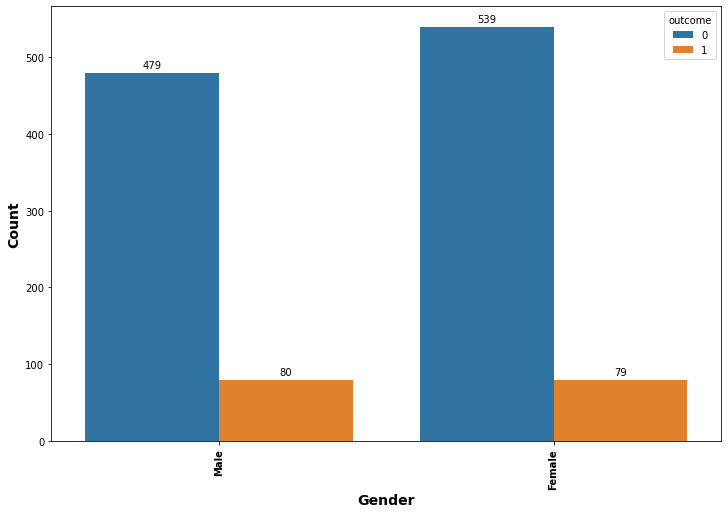

In [65]:
plt.figure(figsize=(12,8))
plot = sns.countplot(df_final['gendera'], hue=df_final['outcome'])
plt.xlabel('Gender', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xticks(np.arange(2), ['Male', 'Female'], rotation='vertical', weight='bold')

for i in plot.patches:
  plot.annotate(format(i.get_height()),
                (i.get_x() + i.get_width()/2,
                 i.get_height()), ha='center', va='center',
                size=10, xytext=(0,8),
                textcoords='offset points') 

plt.show()

### Приведенный выше график представляет гендерное распределение

> левый блок - мужчины (559 человек)
> правый блок - женщины (618 человек)
 

> Из 559 пациентов мужского пола 80 умерли, а еще 470 пациентов остались живы (14,3% - это процент смерти)
 
> из 618 пациенток женского пола 539 пациентов были живы, а 79 пациентов умерли (т.е. 12,8%)

> из всех пациентов 47,5% составляют пациенты мужского пола, а 52,5% пациентов - женщины

> мужская смертность в этом конкретном наборе данных выше женской на 1,5%

# Кореляция

### Общая кореляция между сопутствующими заболеваниями и показателем Outcome

In [66]:
col = ['group', 'gendera', 'hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'outcome']

In [67]:
corr = df_final[col].corr()

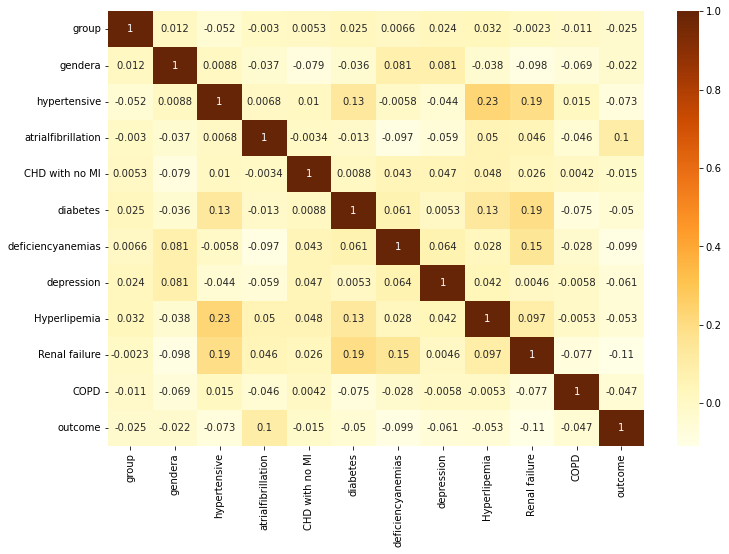

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='YlOrBr');

### Корреляция между показателями результатов разрличных анализов и смертностью

In [69]:
cols = ['age', 'BMI', 'heart rate','Systolic blood pressure', 'Diastolic blood pressure','Respiratory rate', 'temperature', 
        'SP O2', 'Urine output','hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte','Platelets', 'Neutrophils', 
        'Basophils', 'Lymphocyte', 'PT', 'INR','NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen','glucose', 
        'Blood potassium', 'Blood sodium', 'Blood calcium','Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF', 'outcome']

In [70]:
cor = df_final[cols].corr()

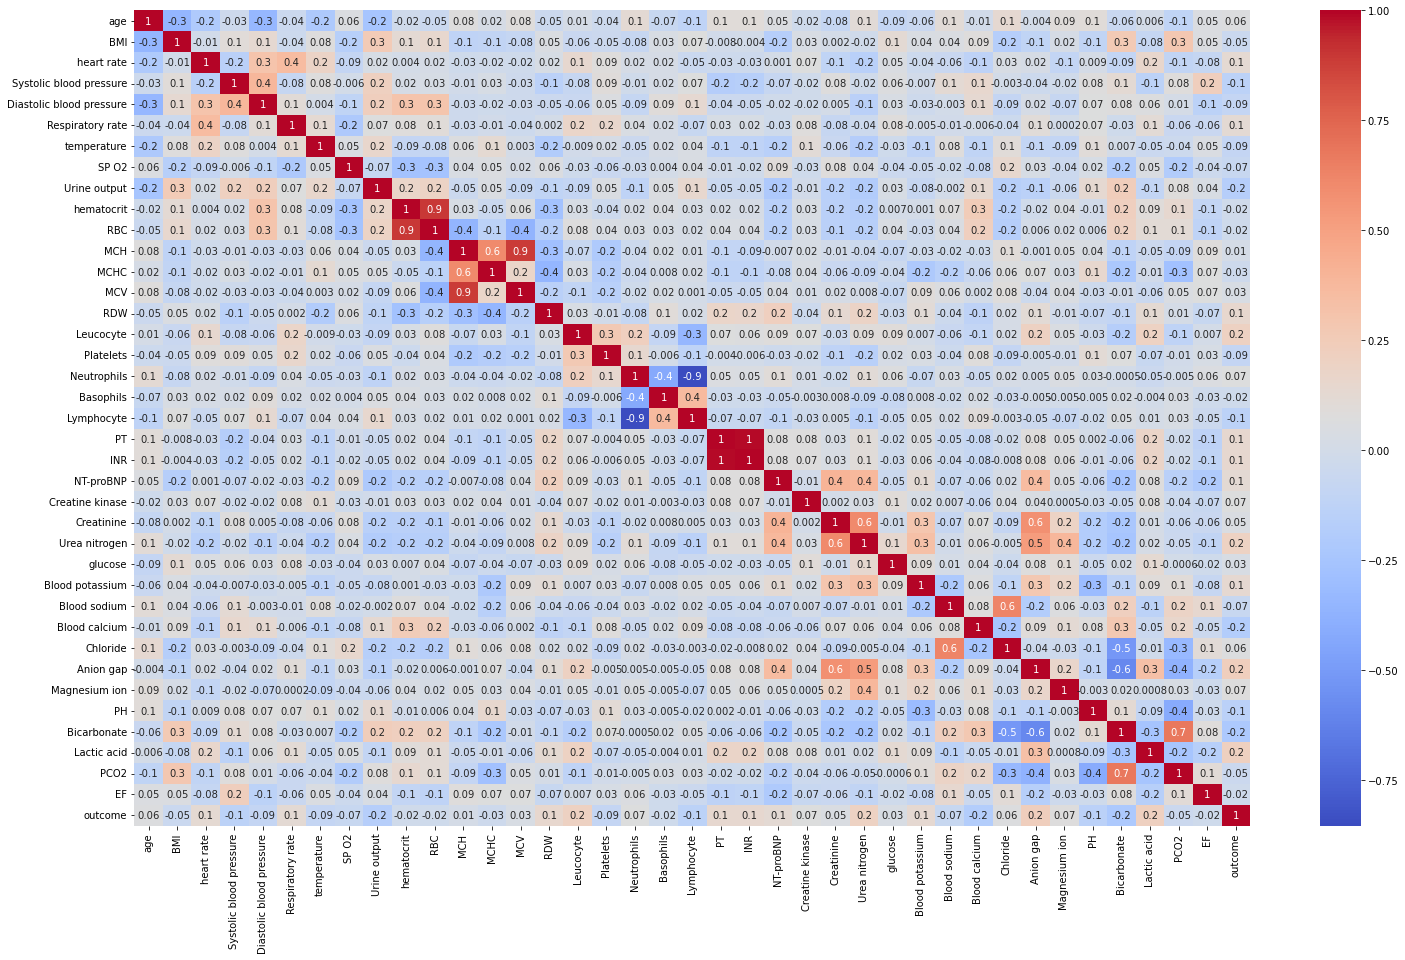

In [71]:
plt.figure(figsize=(25,15))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.0g');

### Общая корреляция по всем признакам

In [74]:
fcor = df_final.corr()

In [75]:
fcor

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome
group,1.00,0.00,0.00,0.01,-0.04,-0.05,-0.00,0.01,0.03,0.01,...,0.04,0.00,0.01,0.02,-0.06,0.00,0.01,0.01,-0.01,-0.02
ID,0.00,1.00,-0.03,-0.03,0.04,-0.00,-0.01,0.04,0.02,-0.03,...,-0.01,-0.02,-0.00,-0.02,-0.00,-0.00,0.01,0.01,0.02,0.04
age,0.00,-0.03,1.00,0.08,-0.35,0.18,0.29,0.04,-0.09,0.02,...,-0.01,0.14,-0.00,0.09,0.10,-0.06,0.01,-0.11,0.05,0.06
gendera,0.01,-0.03,0.08,1.00,0.02,0.01,-0.04,-0.08,-0.04,0.08,...,0.06,0.00,-0.05,-0.03,-0.07,0.04,0.01,0.07,0.17,-0.02
BMI,-0.04,0.04,-0.35,0.02,1.00,-0.03,-0.11,-0.06,0.14,-0.02,...,0.09,-0.17,-0.11,0.02,-0.11,0.26,-0.08,0.28,0.05,-0.05
hypertensive,-0.05,-0.00,0.18,0.01,-0.03,1.00,0.01,0.01,0.13,-0.01,...,0.08,-0.02,0.07,0.00,0.02,0.01,-0.02,-0.01,0.01,-0.07
atrialfibrillation,-0.00,-0.01,0.29,-0.04,-0.11,0.01,1.00,-0.00,-0.01,-0.10,...,0.02,0.02,0.05,0.07,0.04,-0.07,0.04,-0.09,0.01,0.10
CHD with no MI,0.01,0.04,0.04,-0.08,-0.06,0.01,-0.00,1.00,0.01,0.04,...,0.02,-0.06,0.02,0.02,0.06,-0.01,0.01,-0.06,-0.15,-0.01
diabetes,0.03,0.02,-0.09,-0.04,0.14,0.13,-0.01,0.01,1.00,0.06,...,0.08,-0.03,0.04,0.02,-0.02,0.04,0.03,0.06,-0.03,-0.05
deficiencyanemias,0.01,-0.03,0.02,0.08,-0.02,-0.01,-0.10,0.04,0.06,1.00,...,-0.05,0.06,-0.02,0.03,0.01,-0.06,-0.10,-0.07,-0.03,-0.10


### Значительных величин корреляций нет. Это указывает на отсутствие проблемы мультиколлинеарности в предоставленных данных.

# Случайное наблюдение за распределением данных для переменных

In [76]:
cols = ['age', 'BMI', 'heart rate','Systolic blood pressure', 'Diastolic blood pressure','Respiratory rate', 'temperature', 
        'SP O2', 'Urine output','hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte','Platelets', 'Neutrophils', 
        'Basophils', 'Lymphocyte', 'PT', 'INR','NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen','glucose', 
        'Blood potassium', 'Blood sodium', 'Blood calcium','Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']

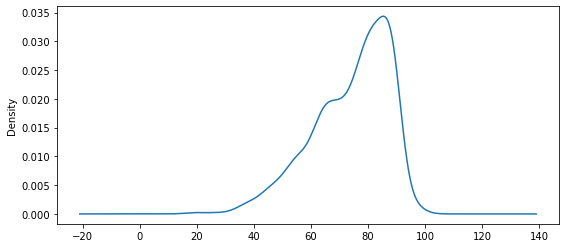

In [77]:
plt.figure(figsize=(9,4))
df_final['age'].plot(kind='kde');

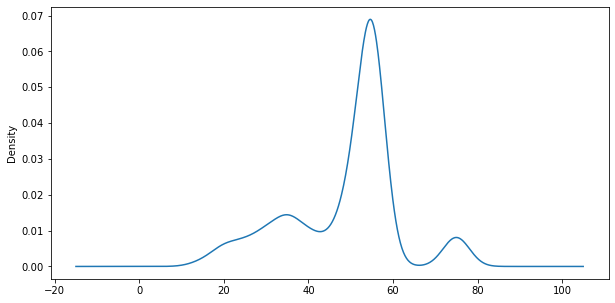

In [78]:
plt.figure(figsize=(10,5))
df_final['EF'].plot(kind='kde');

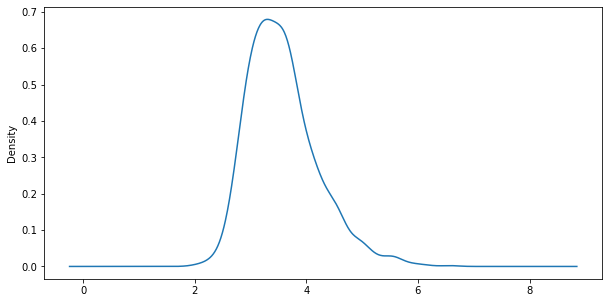

In [79]:
plt.figure(figsize=(10,5))
df_final['RBC'].plot(kind='kde');

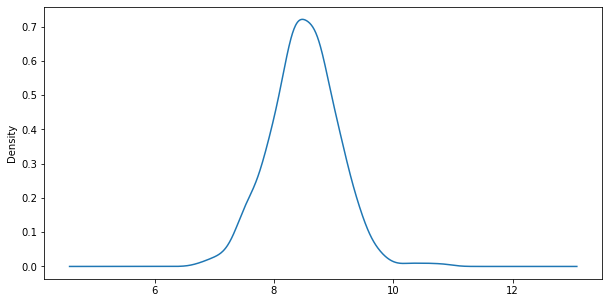

In [80]:
plt.figure(figsize=(10,5))
df_final['Blood calcium'].plot(kind='kde');

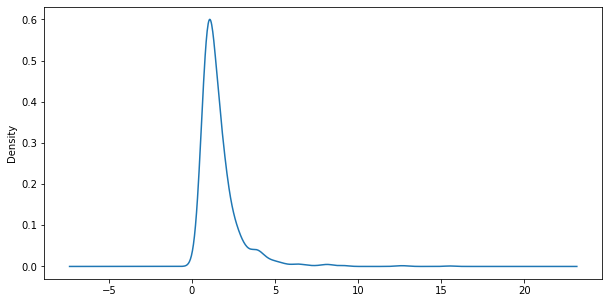

In [81]:
plt.figure(figsize=(10,5))
df_final['Creatinine'].plot(kind='kde');

##### * Из приведенных выше случайных наблюдений следует, что большинство переменных-предикторов были распределены нормально.*

## Разделение зависимых и независимых переменных

In [82]:
x = df_final.drop(columns='outcome')
y = df_final[['outcome']]

## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)

In [84]:
print(x_train.shape, x_test.shape)

(823, 50) (354, 50)


In [85]:
x_test_id = x_test['ID']

### удаление столбца идентификатора пациента как из тестовых, так и из обучающих наборов данных

In [86]:
x_train.drop(columns = 'ID', inplace=True)
x_test.drop(columns='ID', inplace=True)

In [87]:
print(x_train.shape, x_test.shape)

(823, 49) (354, 49)


# Разработка модели

In [90]:
from xgboost import XGBClassifier, plot_tree, plot_importance

In [91]:
xgb = XGBClassifier(random_state=123)

In [92]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

In [94]:
pred = xgb.predict(x_test)

# Оценка модели

In [95]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [96]:
cf = confusion_matrix(y_test, pred)

In [97]:
cf

array([[296,   5],
       [ 41,  12]])

In [98]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       301
           1       0.71      0.23      0.34        53

    accuracy                           0.87       354
   macro avg       0.79      0.60      0.64       354
weighted avg       0.85      0.87      0.84       354



In [99]:
y_train.value_counts()

outcome
0          717
1          106
dtype: int64

In [100]:
y_test.value_counts()

outcome
0          301
1           53
dtype: int64

# Сравнение

In [102]:
m = np.concatenate((y_test.values.reshape(len(y_test),1), pred.reshape(len(pred),1)),1)

In [103]:
m = pd.DataFrame(m, index=x_test_id, columns=['y_test', 'y_pred'])

In [104]:
m.head(20)

,y_test,y_pred
ID,,
135043,0,0
102028,0,0
103673,0,0
163520,0,0
132082,0,0
106007,0,0
133187,0,0
124739,0,0
190943,0,0


### Как упоминалось ранее, это сильно несбалансированный набор данных из всех пациентов только 14% пациентов умерли, но оставшиеся 86% пациентов были живы, из-за этого дисбаланса в природе меньше смещения в сторону основного класса (т.е. 0 живых) и высокая дисперсия тестовых данных из-за этой причины модель предсказала все пациенты как живые, более того, как видно из отчета о классификации, точность составляет 85%, но оценка f1 для класса меньшинства составляет 36%, чтобы решить эту проблему, мы должны сбалансировать данные между классом большинства (т.е. 0) и классом меньшинства (т.е. 1), были доступны различные методы, но для этого исследования я буду использовать **SMOTE ("Метод синтетической передискретизации меньшинства")**

# SMOTE (Synthetic Minority Oversampling Technique) – Oversampling
## SMOTE синтезирует новые миноритарные экземпляры аналогично реальным миноритарным экземплярам.

In [111]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/base.py)

In [112]:
X = x.drop(columns='ID')
Y = y.copy()

In [113]:
smote = SMOTE(sampling_strategy='minority')

NameError: name 'SMOTE' is not defined

In [ ]:
x_s, y_s = smote.fit_resample(X, Y)

### Train Test Split 

1.   70% training data
2.   30% test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x_s, y_s, test_size=0.3, random_state=123)

## Модель на сбалансированном наборе данных

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=123, seed=123)

In [ ]:
xgb.fit(X_train, Y_train)

In [ ]:
pred_b = xgb.predict(X_test)

### Сравнение с фактическими значениями

In [ ]:
con = confusion_matrix(Y_test, pred_b)

con

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(con, annot=True, cmap='viridis', fmt='.0f');
plt.xlabel('Predicted', fontsize=14, weight='bold')
plt.ylabel('Actual', fontsize=14, weight='bold')

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test, pred_b).ravel()

print(tn)
print(fp)
print(fn)
print(tp)

In [ ]:
print(classification_report(Y_test, pred_b))

##### Предыдущий отчет о классификации (т.е. Данные о дисбалансе)

In [ ]:
print(classification_report(y_test, pred))

### Из приведенных выше сравнений показатели точности отзыва были значительно улучшены

# Plotting XGBoost, ROC and precision recall curve

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [ ]:
plot_roc_curve(xgb, X_test, Y_test)
plt.plot([0,1], [0,1], color='magenta', ls='-');

### Из приведенной выше кривой ROC площадь под кривой равна 98%

In [ ]:
plot_precision_recall_curve(xgb, X_test, Y_test);

In [ ]:
plt.rcParams['figure.figsize'] = [10,40]
plot_tree(xgb);

# Важные функции

In [ ]:
imp = xgb.feature_importances_

imp

In [ ]:
fi = pd.Series(imp, index=X.columns)
fi.sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(15,8))
fi.nlargest(n=18).plot(kind='barh');